In [1]:
import mbuild as mb
from molGrouper.group_graph import GroupGraph
from molGrouper.generate import generate_group_graph_space
from rdkit import Chem
import networkx as nx
from pysmiles import read_smiles, write_smiles
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from group_selfies import Group

/Users/kieran/miniconda3/envs/molGrouper/lib/python3.9/site-packages/mdtraj/geometry/order.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import parse_version
/Users/kieran/miniconda3/envs/molGrouper/lib/python3.9/site-packages/pkg_resources/__init__.py:2846: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/Users/kieran/miniconda3/envs/molGrouper/lib/python3.9/site-packages/pkg_resources/__init__.py:2846: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https:

# ECO-AI

In [ ]:
fragments = [
    Group('hydroxl', 'O[H]', all_attachment=True), #OH
    Group('carbon_1111', 'C(*1)(*1)(*1)(*1)'), 
    Group('carbon_112', 'C(*1)(*1)(*2)'), 
    Group('carbon_22', 'C(*2)(*2)'), 
    # Group('carbon_13', 'C(*1)(*3)'), 
    Group('methine_3', 'C([H])', all_attachment=True), #CH
    Group('methine_12', 'C([H])(*2)(*1)'),
    Group('methine_111', 'C([H])(*1)(*1)(*1)'), 
    Group('methylene_2', 'C([H])([H])(*2)'), #CH2
    Group('methylene_11', 'C([H])([H])(*1)(*1)'), 
    Group('methyl_1', 'C([H])([H])[H]', all_attachment=True), #CH3
    Group('amine0_2', 'N(C([H])([H]))(*2)'), #NCH2
    Group('amine0_11', 'N(C([H])([H]))(*1)(*1)'), 
    Group('amine1_2', 'N(C([H])([H])[H])(*2)') , #NCH3
    Group('amine1_11', 'N(C([H])([H])[H])(*1)(*1)'), 
    Group('amine2_12', 'N(C[H])[H]', all_attachment=True), #NHCH
    Group('amine2_11_1', 'N(*1)(C([H])(*1)(*1))[H]'), 
    Group('amine3_1_1', 'C(N[H])([H])[H]', all_attachment=True), #NHCH2
    Group('amine3', '*1N(C([H])([H])[H])[H]'), #NHCH3
    Group('amine4_3', 'C(*3)(N([H])[H])'), #NH2C
    Group('amin4_12', 'C(*2)(*1)(N([H])[H])'), 
    Group('amine4_111', 'C(*1)(*1)(*1)(N([H])[H])'), 
    Group('amine5_2', '*2C(N([H])[H])[H]'), #NH2CH
    Group('amine5_11', 'C(*1)(*1)(N([H])[H])[H]'),
    Group('amine6_1', '*1C(N([H])[H])([H])[H]'),#NH2CH2
]
node_types = {
    'OH': ['O1'],
    'carbon_1111': ['C1', 'C2', 'C3', 'C4'],
    'carbon_112': ['C1', 'C2', 'C3'],
    'carbon_22': ['C1', 'C2'],
    'methine_3': ['C1'],
    'methine_12': ['C1', 'C2'],
    'methine_111': ['C1', 'C2', 'C3'],
    'methylene_2': ['C1',],
    'methylene_11': ['C1', 'C2'],
    'methyl_1': ['C1'],
    'amine0_2': ['N1'],
    'amine0_11': ['N1', 'N2'],
    'amine1_2': ['N1'],
    'amine1_11': ['N1', 'N2'],
    'amine2_12': ['N1', 'N2'],
    'amine2_11_1': ['N1', 'C1', 'C2'],
    'amine3_1_1': ['N1', 'C1'],
    'amine3': ['N1'],
    'amine4_3': ['C1'],
}
node_types_to_smiles = {
    'OH': 'O[H]',
    'carbon_1111': 'C(*1)(*1)(*1)(*1)',
    'carbon_112': 'C(*1)(*1)(*2)',
    'carbon_22': 'C(*2)(*2)',
    'methine_3': 'C([H])',
    'methine_12': 'C([H])(*2)(*1)',
    'methine_111': 'C([H])(*1)(*1)(*1)',
    'methylene_2': 'C([H])([H])(*2)',
    'methylene_11': 'C([H])([H])(*1)(*1)',
    'methyl_1': 'C([H])([H])[H]',
    'amine0_2': 'N(C([H])([H]))(*2)',
    'amine0_11': 'N(C([H])([H]))(*1)(*1)',
    'amine1_2': 'N(C([H])([H])[H])(*2)',
    'amine1_11': 'N(C([H])([H])[H])(*1)(*1)',
    'amine2_12': 'N(C[H])[H]',
    'amine2_11_1': 'N(*1)(C([H])(*1)(*1))[H]',
    'amine3_1_1': 'C(N[H])([H])[H]',
    'amine3': '*1N(C([H])([H])[H])[H]',
    'amine4_3': 'C(*3)(N([H])[H])',

    node
}

# simple amine

In [ ]:
node_types = {
    'N': ['N1'], # amine
    'CO': ['C1', 'C2'], # carbonyl
    'CC': ['C11', 'C12', 'C21', 'C22'], # alkene
    'C': ['C1'], # alkane
    'OH': ['O1'], # alcohol
}
node_type_to_smiles = {
    'N': 'N',
    'CO': 'C=O',
    'CC': 'C=C',
    'C': 'C',
    'OH': 'O'
}
node_port_to_atom_index = {
    'N': {'N1': 0},
    'CO': {'C1': 0, 'C2': 0},
    'CC': {'C11': 0, 'C12': 0, 'C21': 1, 'C22': 1},
    'C': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
    'OH': {'O1': 0}
}
# node_types = {
#     'N': ['N1'], # amine
#     'CO': ['C1', 'C2'], # carbonyl
#     'CC': ['C11', 'C12', 'C21', 'C22'], # alkene
#     'C': ['C1', "C2", "C3", "C4"], # alkane
#     "CF3": ["C1"], # trifluoromethyl
#     "C6": ["C1", "C2", "C3", "C4", "C5", "C6"], # benzene
#     "CF2": ["C1", "C2"] # difluoromethyl
# }
# node_type_to_smiles = {
#     'N': 'N',
#     'CO': 'C=O',
#     'CC': 'C=C',
#     'C': 'C',
#     "CF3": "C(F)(F)F",
#     "C6": "c1ccccc1",
#     "CF2": "C(F)F"
# }
# node_port_to_atom_index = {
#     'N': {'N1': 0},
#     'CO': {'C1': 0, 'C2': 0},
#     'CC': {'C11': 0, 'C12': 0, 'C21': 1, 'C22': 1},
#     'C': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
#     "CF3": {"C1": 0},
#     "C6": {"C1": 0, "C2": 1, "C3": 2, "C4": 3, "C5": 4, "C6": 5},
#     "CF2": {"C1": 0, "C2": 0}
# }
out = generate_group_graph_space(4, node_types)

# Switchables

##### Parameters

In [5]:
fragments = [
    Group('s1', 'C([F])([F])([F])(*1)'),   # single connection
    # Group('s2', 'C(#N)(*1)'), 
    # Group('s3', 'OS(*1)(=O)=O'),
    # Group('d1', 'C(O)=O', all_attachment=True),  # double connection
    Group('d2', 'O(*1)(*1)'),
    Group('d3', 'C(*1)(*1)=O'), 
    Group('c', 'C(*1)(*1)CC(*1)(*1)'),
    Group('d4', 'C(*1)(*1)([F])([F])'), 
    Group('d5', 'C(*1)(*3)'), 
    Group('d6', 'C([H])([H])(*1)(*1)'),
    Group('t1', 'N(*1)(*1)(*1)'), # triple connection
    Group('q1', 'C(*1)(*1)(*1)(*1)'), # quadruple connection
    # Group('q2', 'C(*1)(*1)=C(*1)(*1)'), 
    Group('r1', 'C1=CC=CC=C1', all_attachment=True), # ring conneciton
    # Group('r2', 'C1=CNC=C1', all_attachment=True), 
    # Group('r3', 'C1(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C(*1)(*1)C1(*1)(*1)'),
    
]
node_types = {
    's1' : ['C1'],
    # 's2' : ['C1'],
    # 's3' : ['O1'],
    # 'd1' : ['C1', 'O1'],
    'c' : ['C1', 'C2', 'C3', 'C4'],
    'd2' : ['O1', 'O2'],
    'd3' : ['C1', 'O1'],
    'd4' : ['C1', 'C2'],
    'd5' : ['C1', 'C2'],
    'd6' : ['C1', 'C2'],
    't1' : ['N1', 'N2', 'N3'],
    'q1' : ['C1', 'C2', 'C3', 'C4'],
    # 'q2' : ['C11', 'C12', 'C21', 'C22'],
    'r1' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], # benzene double bonded ring
    # 'r2' : ['C1', 'C2', 'C3', 'C4', 'N1'],
    # 'r3' : ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'], # benzene single bonded ring

}
node_type_to_smiles = {
    's1' : 'C',
    # 's2' : 'C#N',
    # 's3' : 'OS(=O)=O',
    # 'd1' : 'C(=O)O',
    'c' : 'C',
    'd2' : 'O',
    'd3' : 'C=O',
    'd4' : 'C(F)(F)',
    'd5' : 'C',
    'd6' : 'C',
    't1' : 'N',
    'q1' : 'C',
    # 'q2' : 'C=C',
    # 'r1' : 'c1ccccc1',
    'r1' : 'C1=CC=CC=C1',
    # 'r2' : 'C1=CNC=C1',
    # 'r3' : 'C1CCCCC1',
}
node_port_to_atom_index = {
    's1' : {'C1':    0},
    # 's2' : {'C1': 0},
    # 's3' : {'O1': 0},
    # 'd1' : {'C1': 0, 'O1': 0},
    'd2' : {'O1': 0, 'O2': 0},
    'd3' : {'C1': 0, 'O1': 0},
    'd4' : {'C1': 0, 'C2': 0},
    'd5' : {'C1': 0, 'C2': 0},
    'd6' : {'C1': 0, 'C2': 0},
    't1' : {'N1': 0, 'N2': 0, 'N3': 0},
    'q1' : {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0},
    # 'q2' : {'C11': 0, 'C12': 0, 'C21': 1, 'C22': 1},
    'r1' : {'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'C5': 4, 'C6': 5},
    # 'r2' : {'C1': 0, 'C2': 1, 'C3': 2, 'C4': 3, 'N1': 4},
    # 'r3' : {'C1': 0, 'C2': 0, 'C3': 1, 'C4': 1, 'C5': 2, 'C6': 2, 'C7': 3, 'C8': 3, 'C9': 4, 'C10': 4, 'C11': 5, 'C12': 5},
    'c': {'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0}
}
graph = GroupGraph(node_types)

In [6]:
out = generate_group_graph_space(4, node_types)

>A /Users/kieran/projects/molGrouper/molGrouper/../packages/nauty2_8_8/geng -ctfd1D3 n=4 e=3
>Z 2 graphs generated in 0.00 sec
>A vcolg -m10T geng_out.txt vcolg_out.txt
>Z 2 graphs read from geng_out.txt; 7250 coloured graphs written to vcolg_out.txt; 0.00 sec
>A multig -m36VT vcolg_out.txt multig_out.txt
>Z 7250 graphs read from vcolg_out.txt; 311754000 multigraphs written to multig_out.txt; 30.89 sec


In [7]:
unique_mols = set()
groupGraphs = []
for g in out:
    try:
        mG = g.to_molecular_graph(node_type_to_smiles, node_port_to_atom_index)
        if Chem.MolFromSmiles(write_smiles(mG)) is not None:
            canon = Chem.MolToSmiles(Chem.MolFromSmiles(write_smiles(mG)), canonical=True)
            if canon in unique_mols:
                continue
            unique_mols.add(canon)
            groupGraphs.append(g)
        else:
            print("Rdkit failed from conversion between smiles and molecular graph")
            print(g)
            break
    except:
        # print("errored")
        pass
print(f"Unique: {len(unique_mols)}, Total: {len(out)}")

Unique: 1485, Total: 534725


/Users/kieran/miniconda3/envs/molGrouper/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


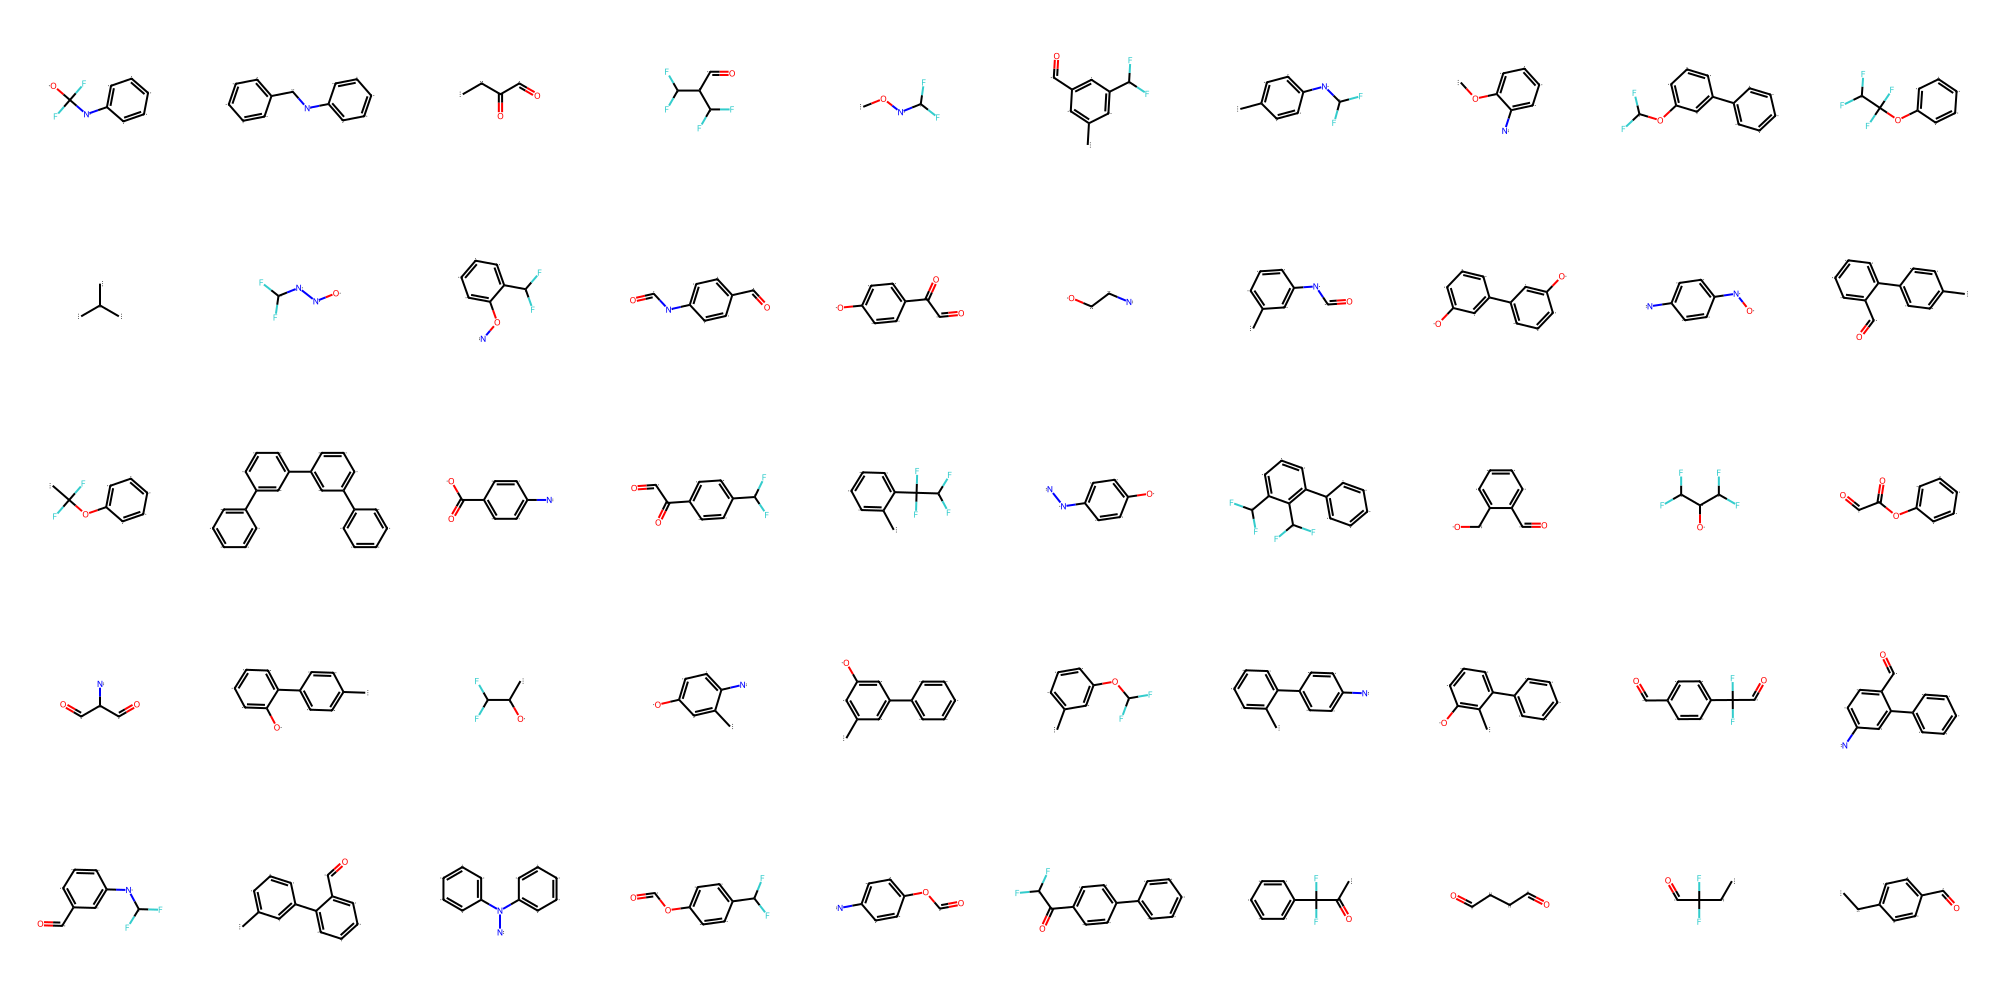

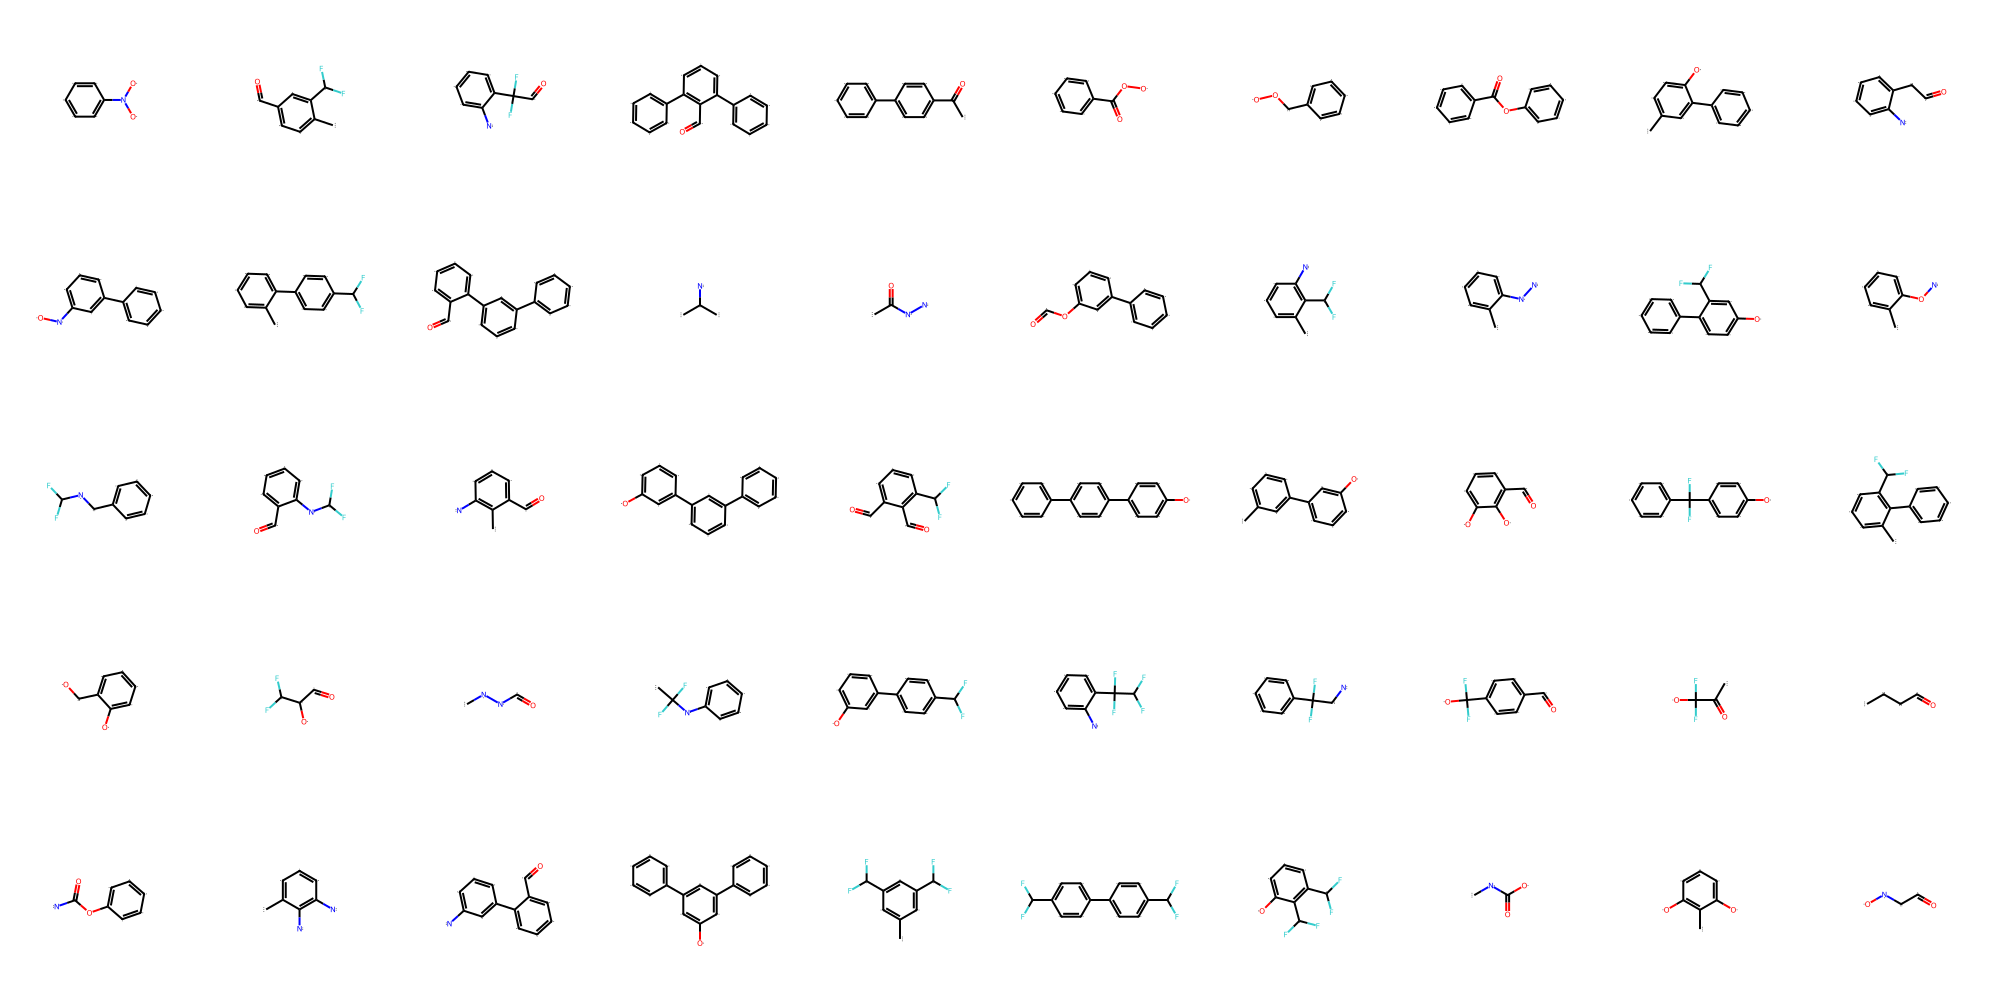

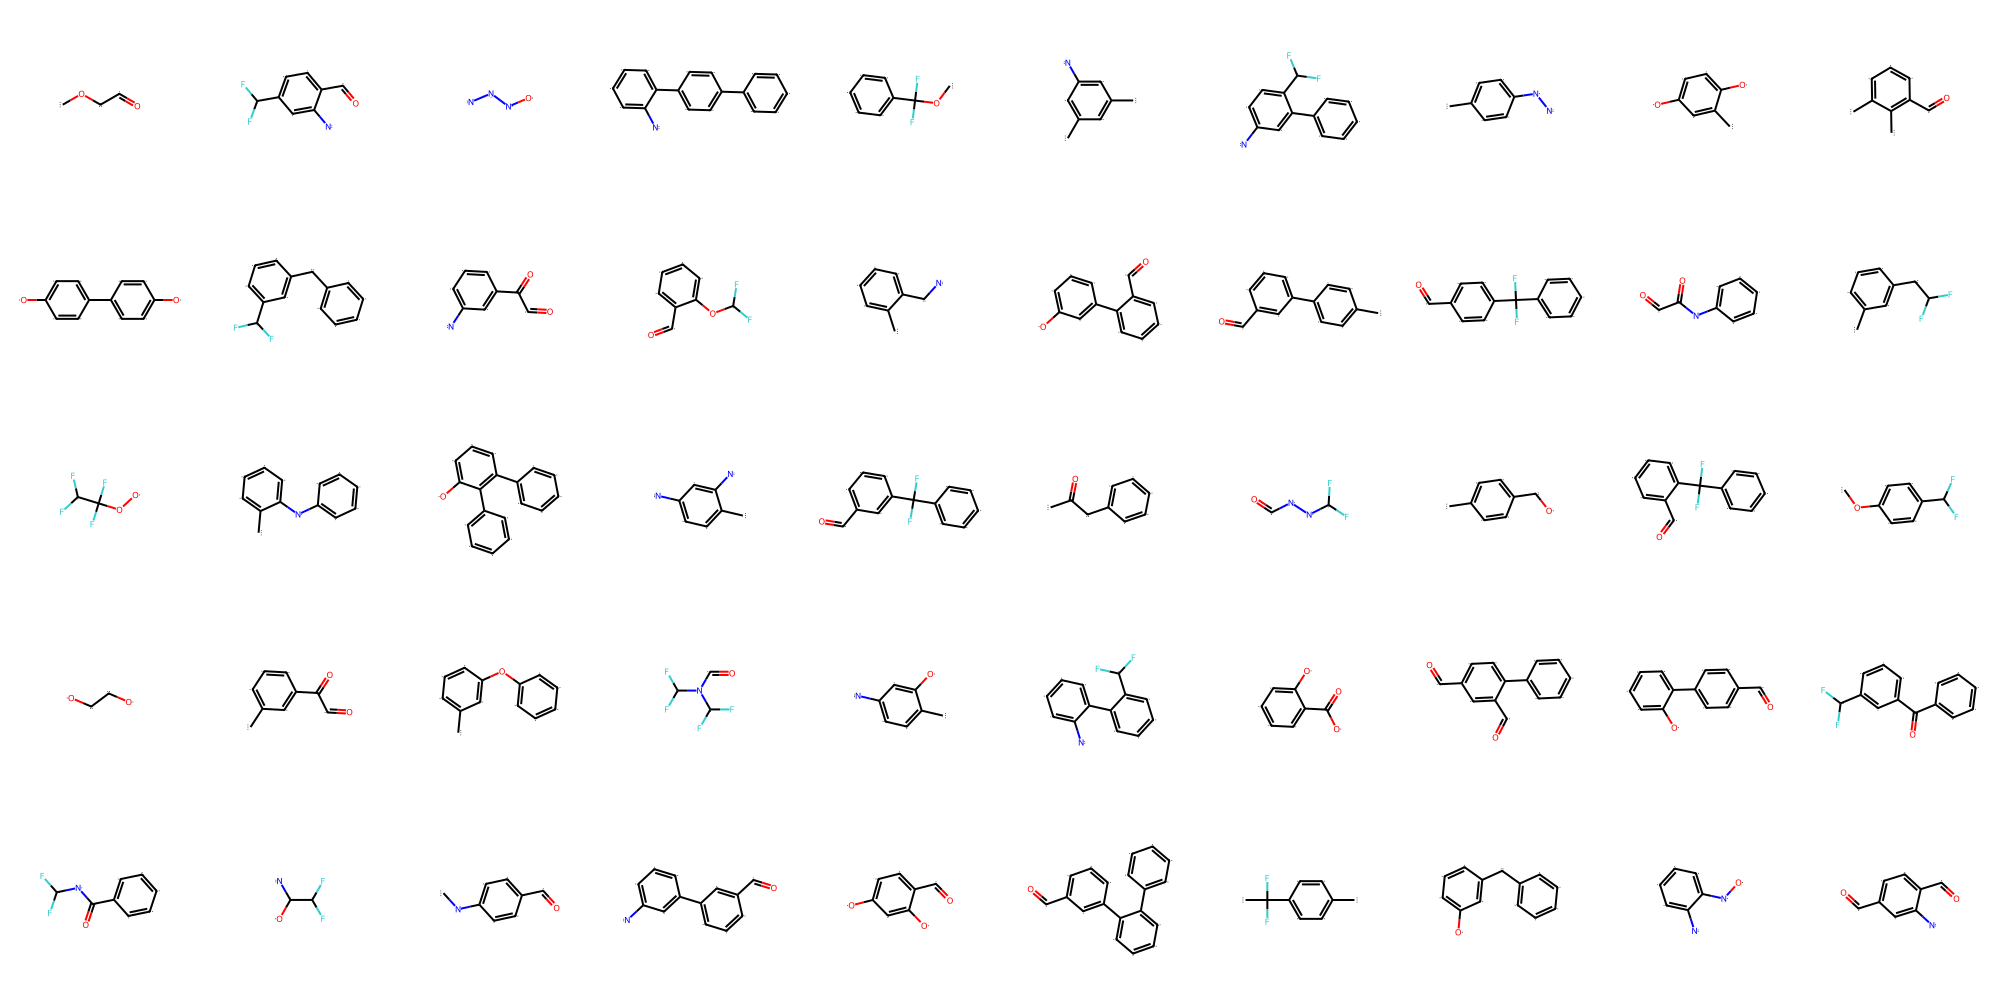

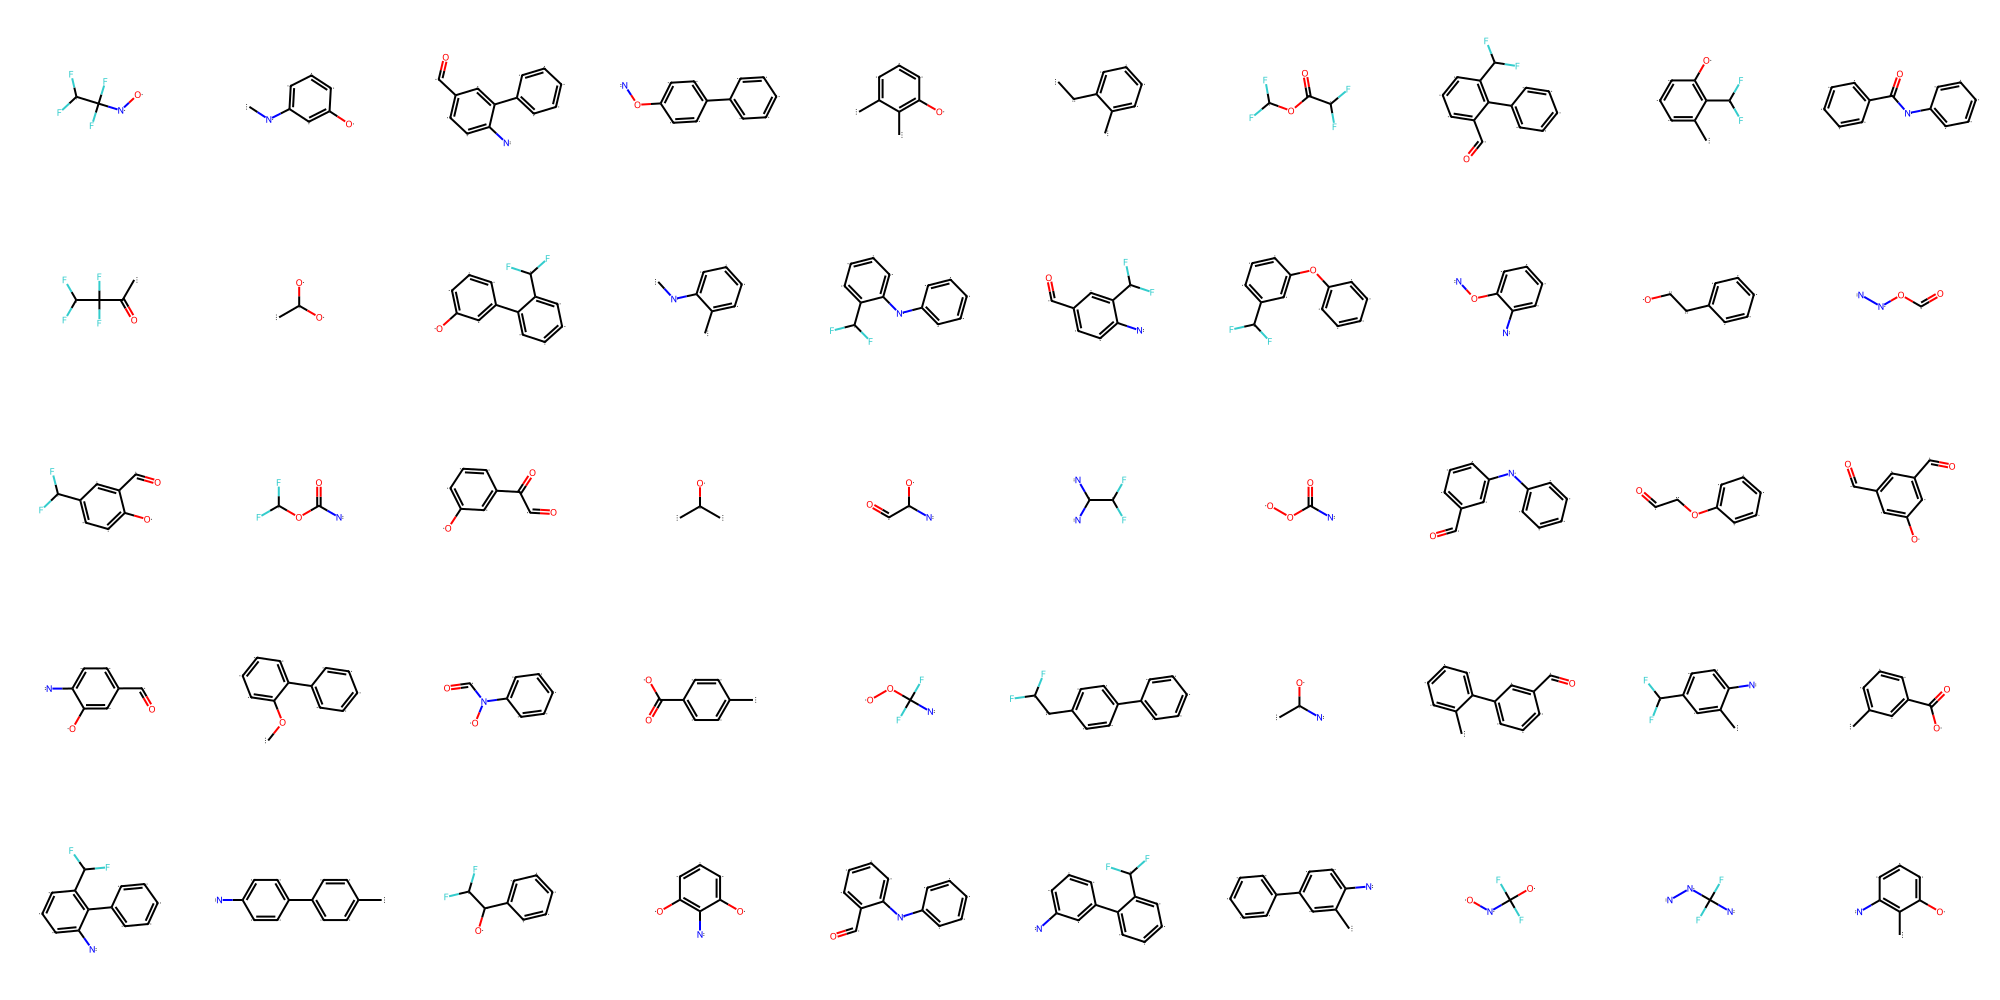

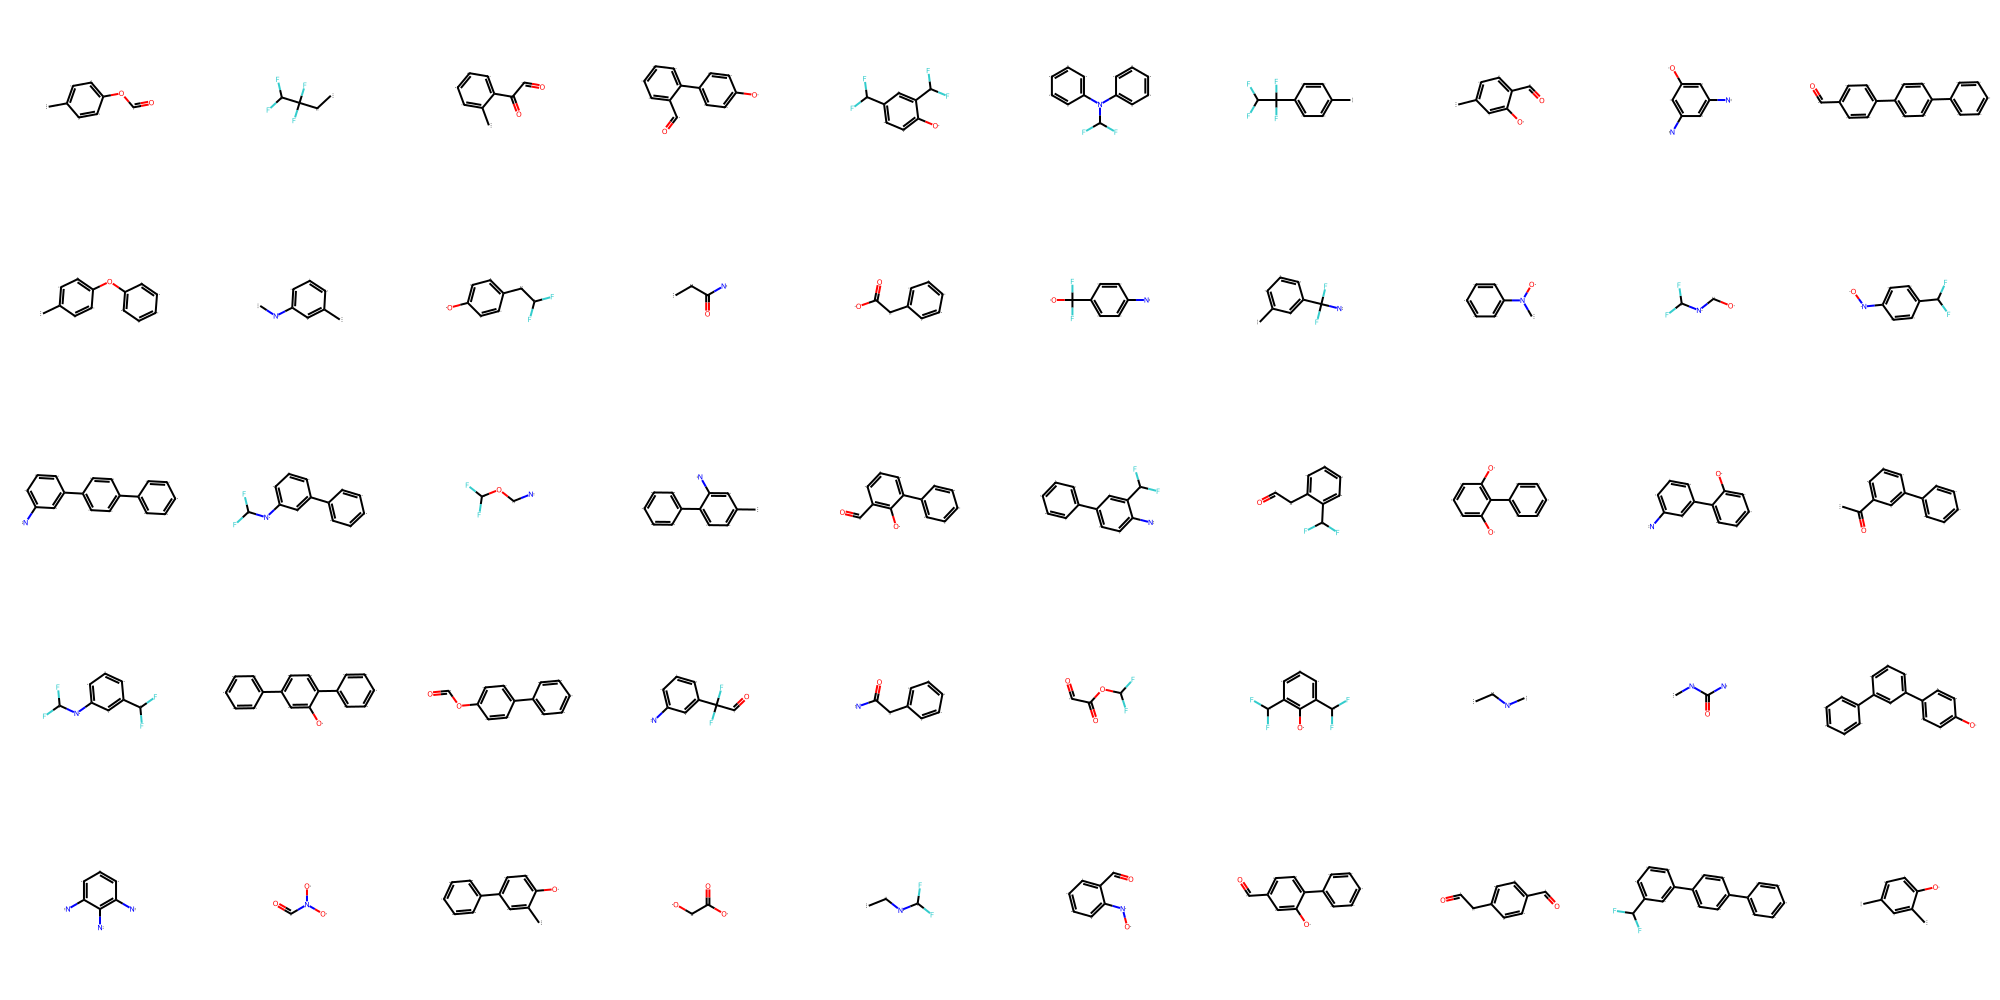

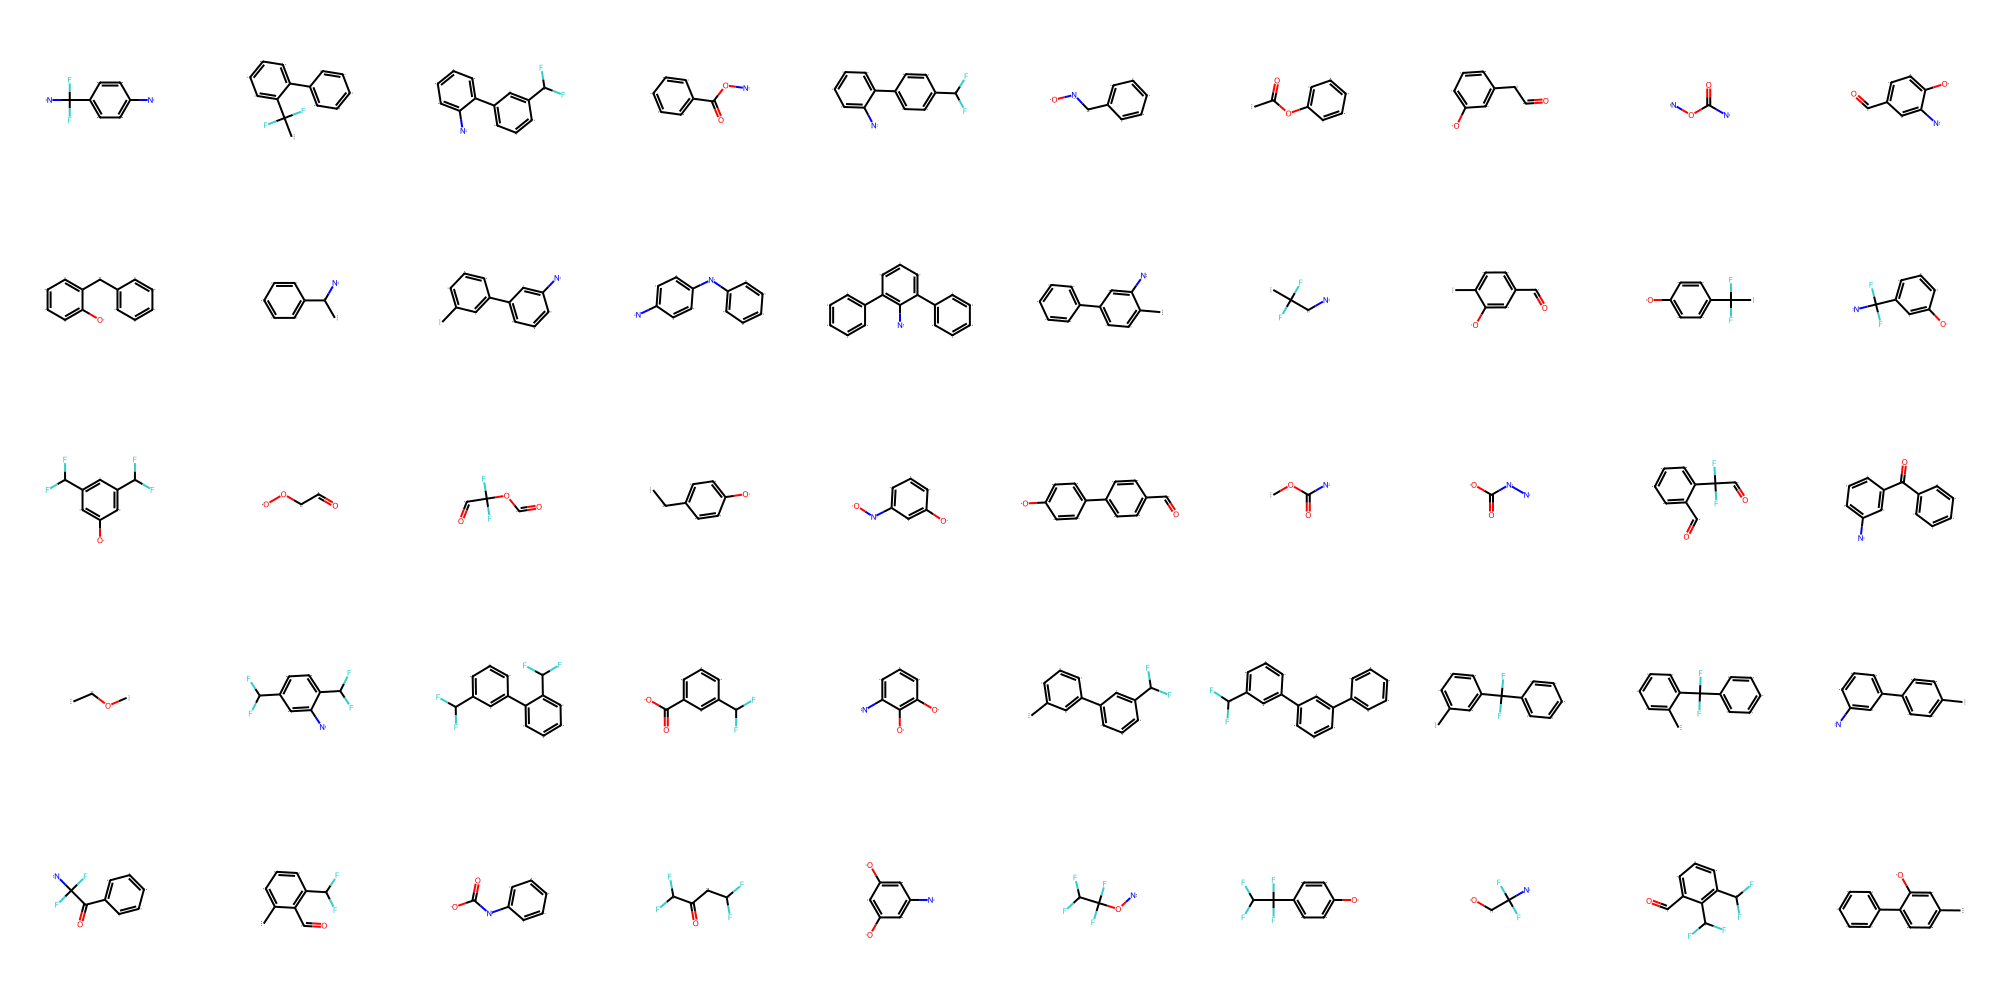

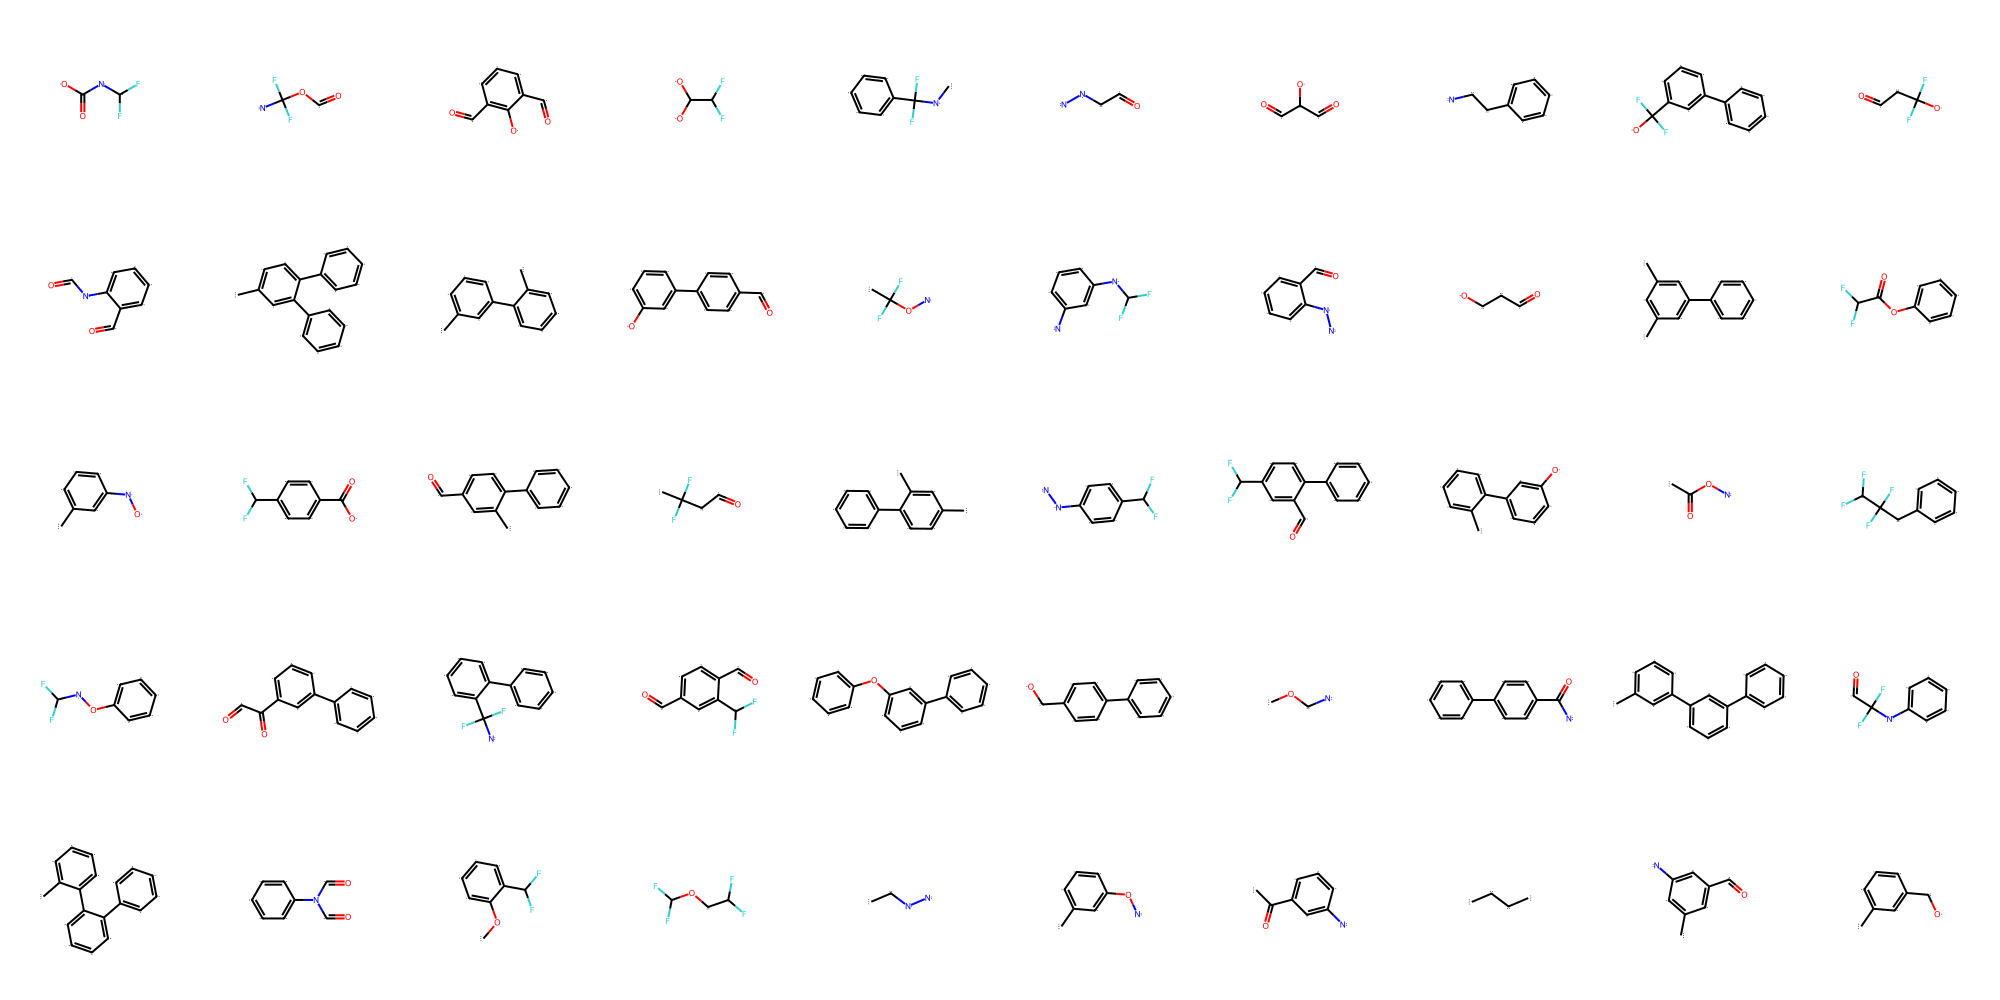

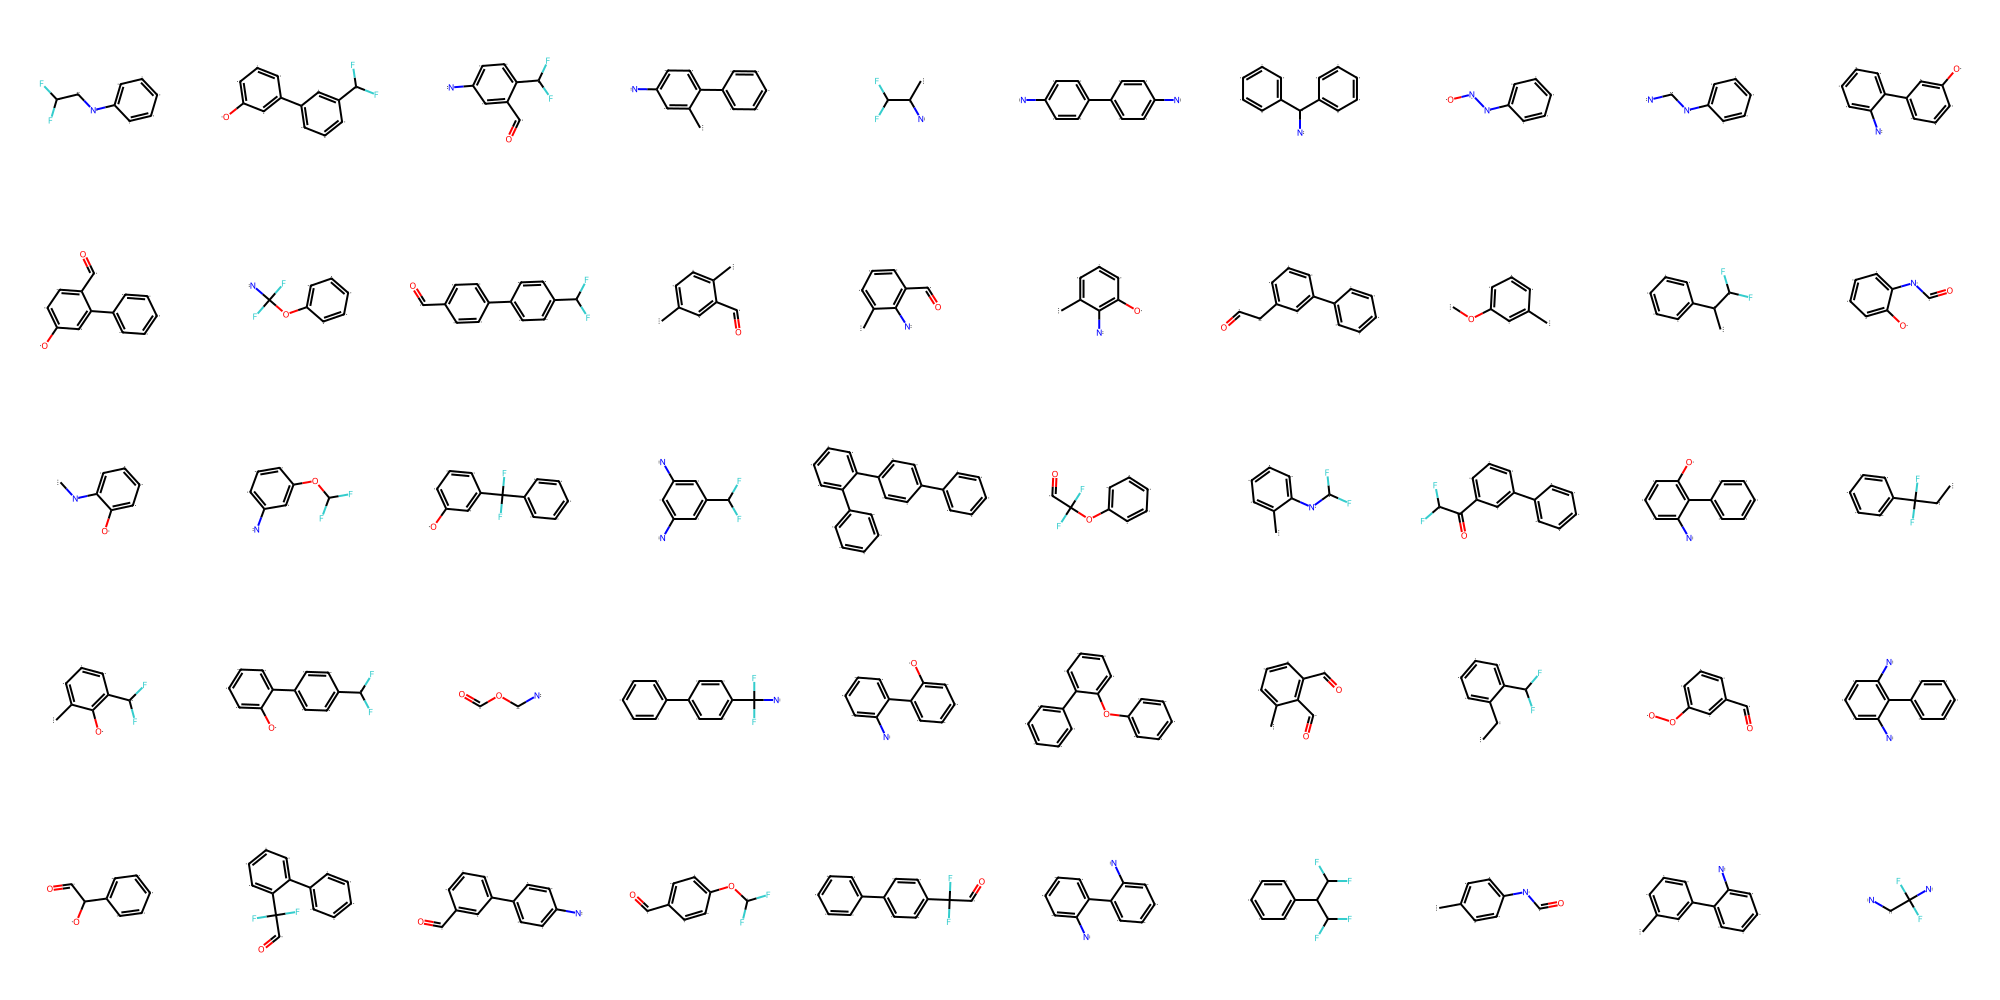

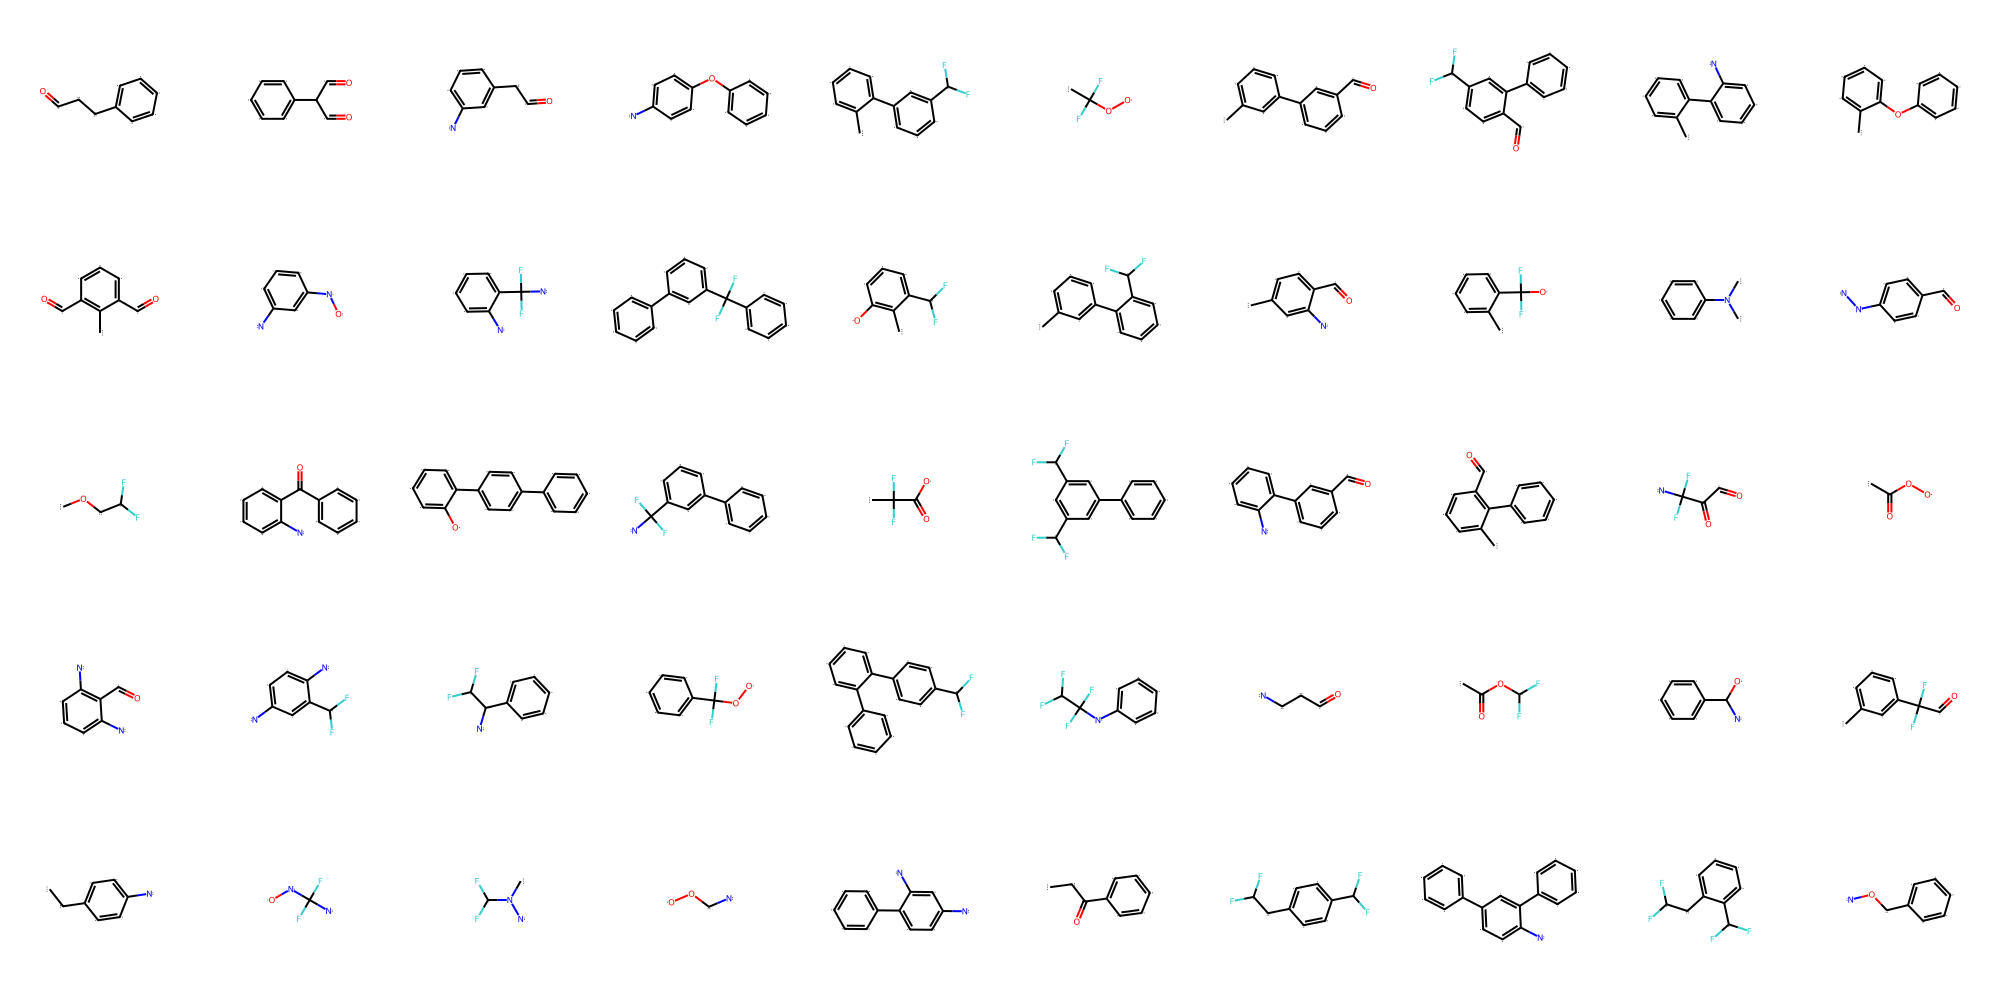

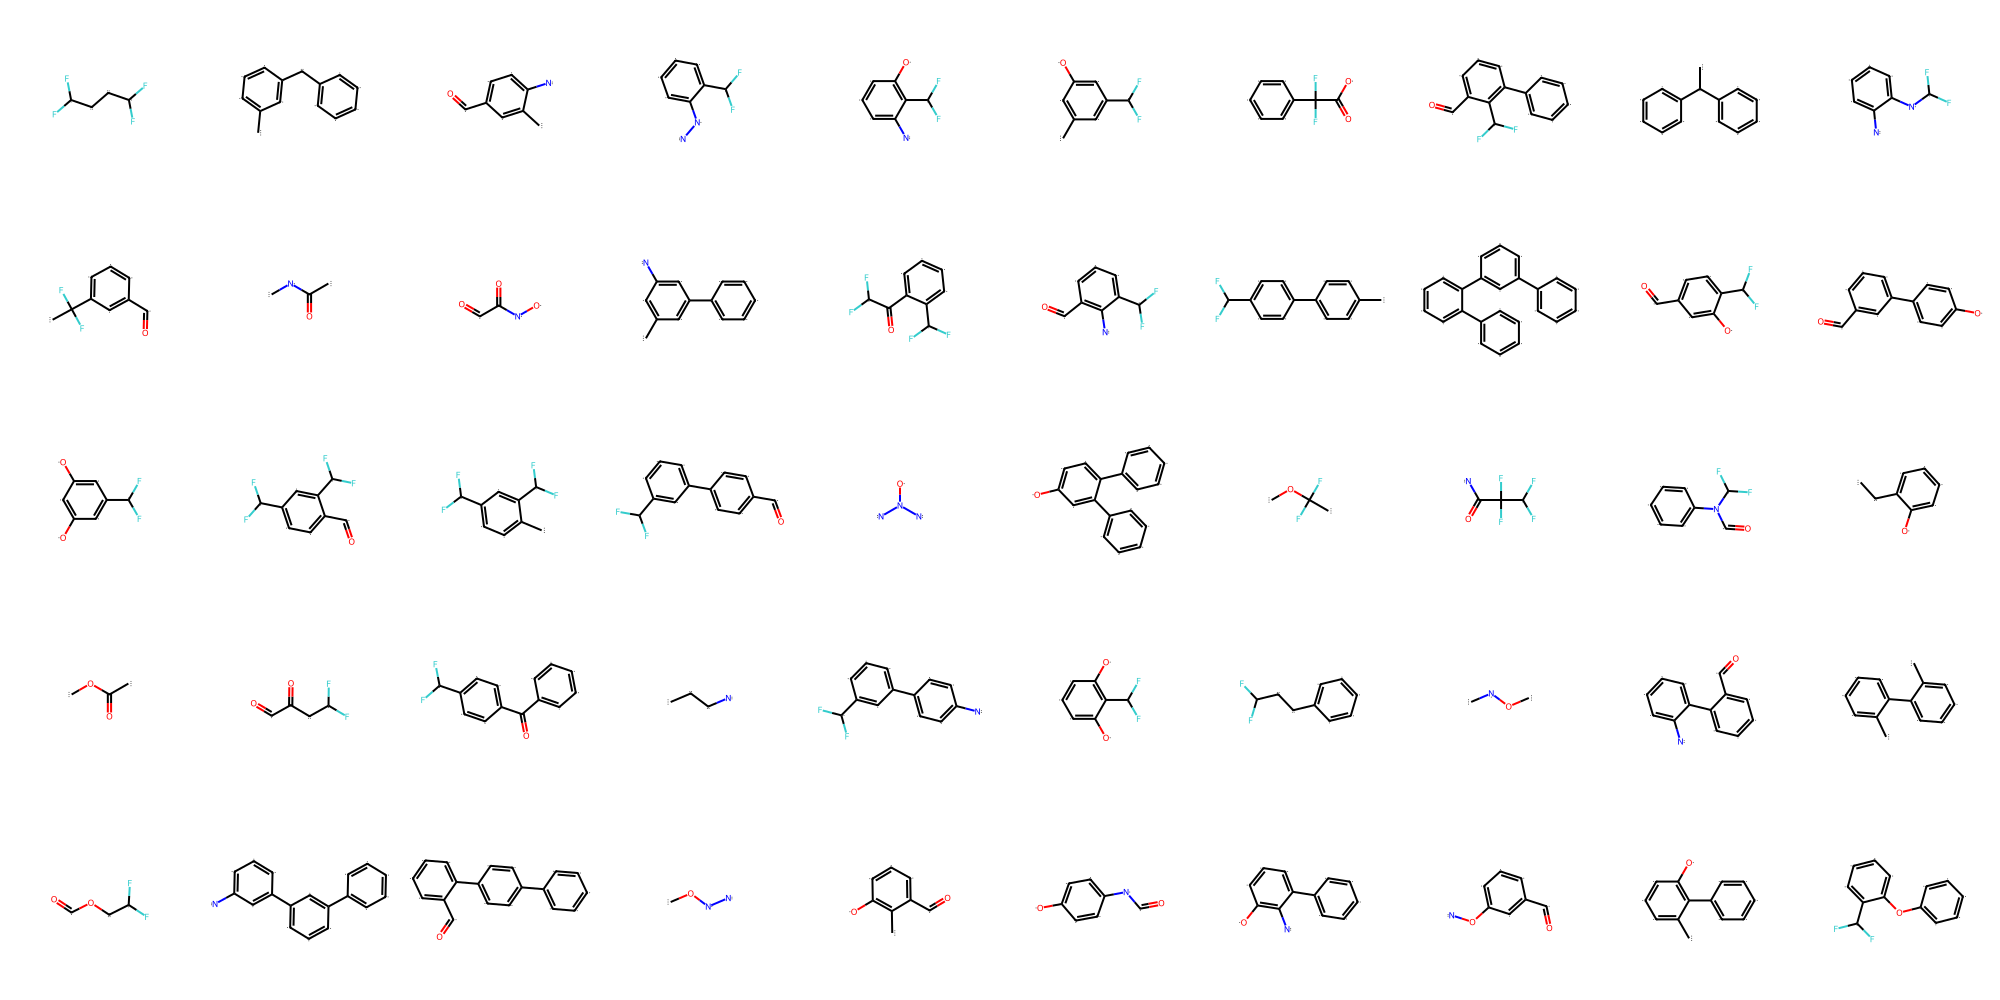

In [8]:
import rdkit
mols = []
unique_mols = list(unique_mols)
# row = []
for i in range(10):
    mols = []
    for m in unique_mols[i*80:(i+1)*80]:
        mols.append(Chem.MolFromSmiles(m))
    display(rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=10))
    plt.show()


In [10]:
with open('group_graphs.txt', 'w') as f:
    for m in unique_mols:
        f.write(m + '\n')